# Kaggle - Intermediate Machine Learning

IOWA HOUSE PRICES PREDICTION

In [127]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [128]:
# Read data
X_full = pd.read_csv('C:/Users/Willians/Desktop/Python/ML/Kaggle_ML_Data-Exercises/iowa_train.csv', index_col = 'Id')
X_test_full = pd.read_csv('C:/Users/Willians/Desktop/Python/ML/Kaggle_ML_Data-Exercises/iowa_test.csv', index_col = 'Id')

# See data:
X_test_full.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
count,1459.000000,1232.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1444.000000,1458.000000,1458.000000,...,1458.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000,1459.000000
mean,57.378341,68.580357,9819.161069,6.078821,5.553804,1971.357779,1983.662783,100.709141,439.203704,52.619342,...,472.768861,93.174777,48.313914,24.243317,1.794380,17.064428,1.744345,58.167923,6.104181,2007.769705
std,42.746880,22.376841,4955.517327,1.436812,1.113740,30.390071,21.130467,177.625900,455.268042,176.753926,...,217.048611,127.744882,68.883364,67.227765,20.207842,56.609763,30.491646,630.806978,2.722432,1.301740
min,20.000000,21.000000,1470.000000,1.000000,1.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,20.000000,58.000000,7391.000000,5.000000,5.000000,1953.000000,1963.000000,0.000000,0.000000,0.000000,...,318.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,50.000000,67.000000,9399.000000,6.000000,5.000000,1973.000000,1992.000000,0.000000,350.500000,0.000000,...,480.000000,0.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,70.000000,80.000000,11517.500000,7.000000,6.000000,2001.000000,2004.000000,164.000000,753.500000,0.000000,...,576.000000,168.000000,72.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,190.000000,200.000000,56600.000000,10.000000,9.000000,2010.000000,2010.000000,1290.000000,4010.000000,1526.000000,...,1488.000000,1424.000000,742.000000,1012.000000,360.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


In [129]:
# Obtain target and predictors
y = X_full.SalePrice

features = ['LotArea', 'YearBuilt', '1stFlrSF', 'FullBath', 'BedroomAbvGr', 'TotRmsAbvGrd']
X = X_full[features].copy()
X_test = X_test_full[features].copy()

In [130]:
# Break off validation set from training data
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

# Print head to see the data frame
X_train.head()

,LotArea,YearBuilt,1stFlrSF,FullBath,BedroomAbvGr,TotRmsAbvGrd
Id,,,,,,
619,11694,2007,1828,2,3,9
871,6600,1962,894,1,2,5
93,13360,1921,964,1,2,5
818,13265,2002,1689,2,3,7
303,13704,2001,1541,2,3,6


# Step 1: Evaluate several models

The next code cell defines five different random forest models.  Run this code cell without changes.

In [131]:
from sklearn.ensemble import RandomForestRegressor

# Define the models
model_1 = RandomForestRegressor(n_estimators=50, random_state=0)
model_2 = RandomForestRegressor(n_estimators=100, random_state=0)
model_3 = RandomForestRegressor(n_estimators=100, criterion="mae", random_state=0)
model_4 = RandomForestRegressor(n_estimators=200, min_samples_split=20, random_state=0)
model_5 = RandomForestRegressor(n_estimators=100, max_depth=7, random_state=0)

models = [model_1, model_2, model_3, model_4, model_5]

To select the best model out of the five, we define a function `score_model()` below.  This function returns the mean absolute error (MAE) from the validation set.

In [132]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different models
def score_dataset(model, X_t=X_train, X_v=X_valid, y_t=y_train, y_v=y_valid):
    model.fit(X_t, y_t)
    preds = model.predict(X_v)
    return mean_absolute_error(y_v, preds)

In [133]:
# Which model is the best?

best_model = min(results)
print("Best model:", round(best_model,2))

Best model: 25586.28


# Step 2: Generate test predictions

Great. You know how to evaluate what makes an accurate model. Now it's time to go through the modeling process and make predictions. In the line below, create a Random Forest model with the variable name `my_model`.

In [134]:
# Define a model
my_model = RandomForestRegressor(random_state=1)

# Fit the model to the training data
my_model.fit(X, y)
preds_test = my_model.predict(X_test)

# Save predictions in format used for competition scoring
output = pd.DataFrame({'Id': X_test.index,
                     'SalePrice': preds_test})
output.to_csv('submission.csv', index=False)
print(output.head())

     Id  SalePrice
0  1461   127675.0
1  1462   162280.0
2  1463   210900.0
3  1464   204030.0
4  1465   199300.0


C:\Users\Willians\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


# Step 3: Submit your results

Once you have successfully completed Step 2, you're ready to submit your results to the leaderboard!
- Begin by clicking on the blue **COMMIT** button in the top right corner.  This will generate a pop-up window.  
- After your code has finished running, click on the blue **Open Version** button in the top right of the pop-up window.  This brings you into view mode of the same page. You will need to scroll down to get back to these instructions.
- Click on the **Output** tab on the left of the screen.  Then, click on the **Submit to Competition** button to submit your results to the leaderboard.
- If you want to keep working to improve your performance, select the blue **Edit** button in the top right of the screen. Then you can change your model and repeat the process.

# MELBOURNE HOUSE PRICE DATA

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split

# File path:
melbourne_file_path = 'C:/Users/Willians/Desktop/Python/ML/Kaggle_ML_Data-Exercises/Melbourne_housing_FULL.csv'

# Load and read the data and store data in DataFrame titled data
data1 = pd.read_csv(melbourne_file_path) 
data = data1.dropna(axis=0)

# Select target
y = data.Price

# To keep things simple, we'll use only numerical predictors
melb_predictors = data.drop(['Price'], axis=1)
X = melb_predictors.select_dtypes(exclude=['object'])
X_test = melb_predictors.select_dtypes(exclude=['object'])

# Divide data into training and validation subsets
X_train, X_valid, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=0)

In [175]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

# Function for comparing different approaches
def score_dataset(X_train, X_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=10, random_state=0)
    model.fit(X_train, y_train)
    preds = model.predict(X_valid) 
    return mean_absolute_error(y_valid, preds)

In [172]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop columns with missing values):
173404.20797578874


# Let's improve the model

## Deal with missing values

There are many ways data can end up with missing values. For example,

A 2 bedroom house won't include a value for the size of a third bedroom.
A survey respondent may choose not to share his income.
Most machine learning libraries (including scikit-learn) give an error if you try to build a model using data with missing values. So you'll need to choose one of the strategies below.

Three Approaches

## 1) A Simple Option: Drop Columns with Missing Values

The simplest option is to drop columns with missing values.

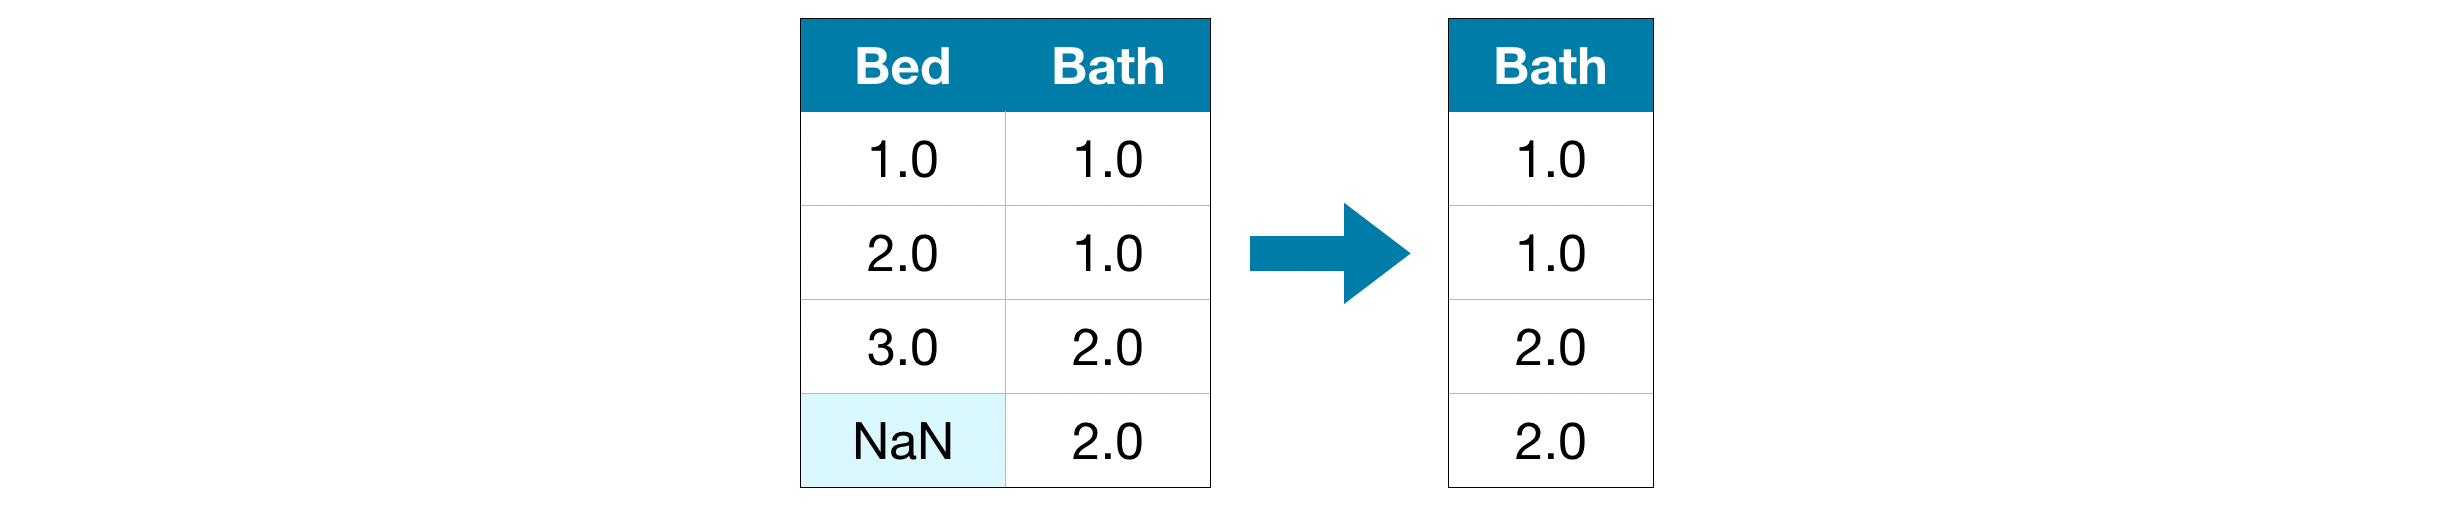

Unless most values in the dropped columns are missing, the model loses access to a lot of (potentially useful!) information with this approach. As an extreme example, consider a dataset with 10,000 rows, where one important column is missing a single entry. This approach would drop the column entirely!

## Score from Approach 1 (Drop Columns with Missing Values)

Since we are working with both training and validation sets, we are careful to drop the same columns in both DataFrames.

In [150]:
# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# Drop columns in training and validation data
reduced_X_train = X_train.drop(cols_with_missing, axis=1)
reduced_X_valid = X_valid.drop(cols_with_missing, axis=1)

print("MAE from Approach 1 (Drop columns with missing values):")
print(score_dataset(reduced_X_train, reduced_X_valid, y_train, y_valid))

MAE from Approach 1 (Drop columns with missing values):
173404.20797578874


## 2) A Better Option: Imputation

Imputation fills in the missing values with some number. For instance, we can fill in the mean value along each column.

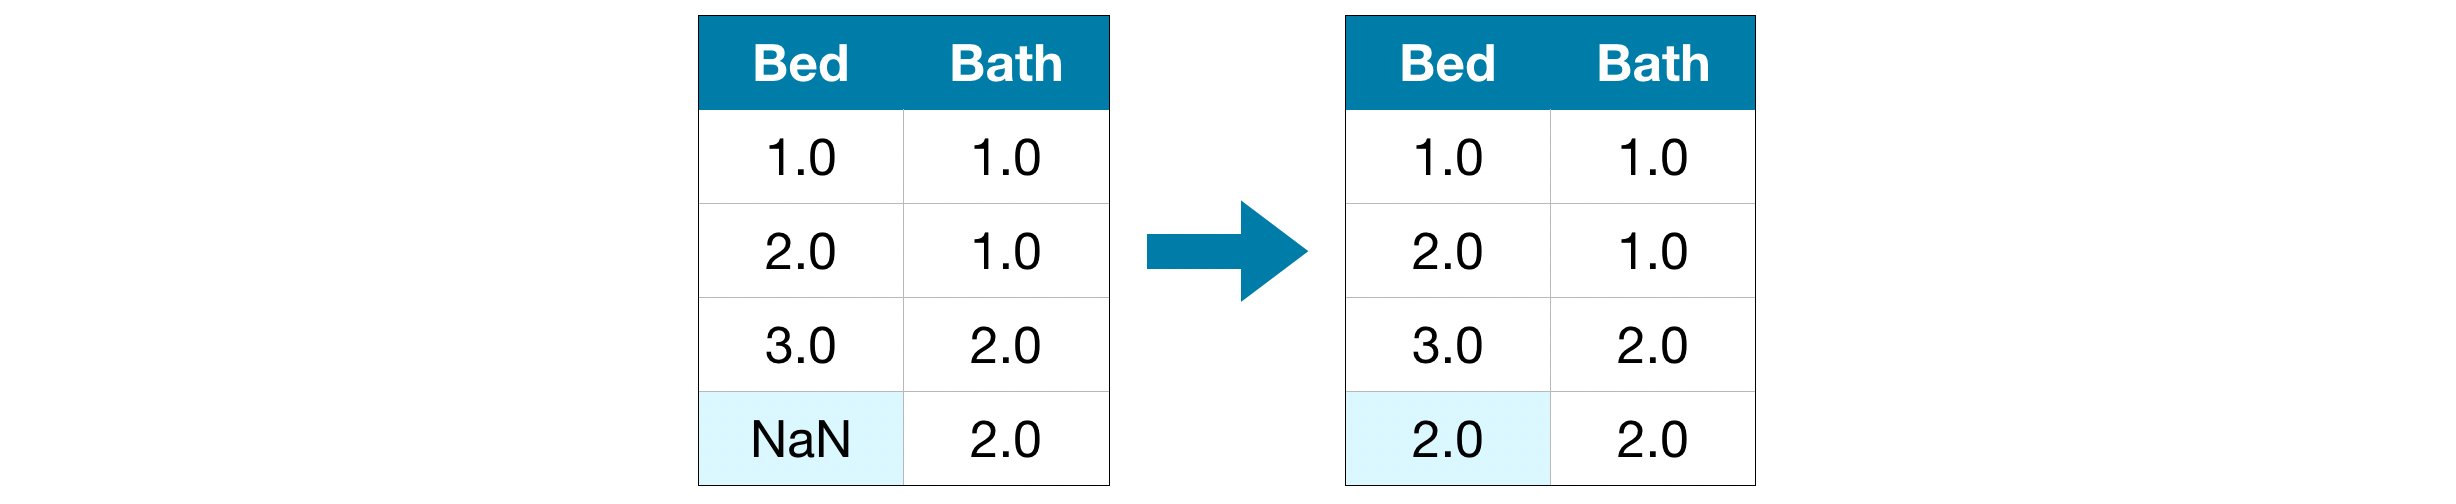

The imputed value won't be exactly right in most cases, but it usually leads to more accurate models than you would get from dropping the column entirely.

# Score from Approach 2 (Imputation)

Next, we use SimpleImputer to replace missing values with the mean value along each column.

Although it's simple, filling in the mean value generally performs quite well (but this varies by dataset). While statisticians have experimented with more complex ways to determine imputed values (such as regression imputation, for instance), the complex strategies typically give no additional benefit once you plug the results into sophisticated machine learning models.

In [165]:
from sklearn.impute import SimpleImputer

# Imputation
my_imputer = SimpleImputer()
imputed_X_train = pd.DataFrame(my_imputer.fit_transform(X_train))
imputed_X_valid = pd.DataFrame(my_imputer.transform(X_valid))

# Imputation removed column names; put them back
imputed_X_train.columns = X_train.columns
imputed_X_valid.columns = X_valid.columns

print("MAE from Approach 2 (Imputation):")
print(score_dataset(imputed_X_train, imputed_X_valid, y_train, y_valid))

MAE from Approach 2 (Imputation):
173404.20797578874


## 3) An Extension To Imputation

Imputation is the standard approach, and it usually works well. However, imputed values may be systematically above or below their actual values (which weren't collected in the dataset). Or rows with missing values may be unique in some other way. In that case, your model would make better predictions by considering which values were originally missing.

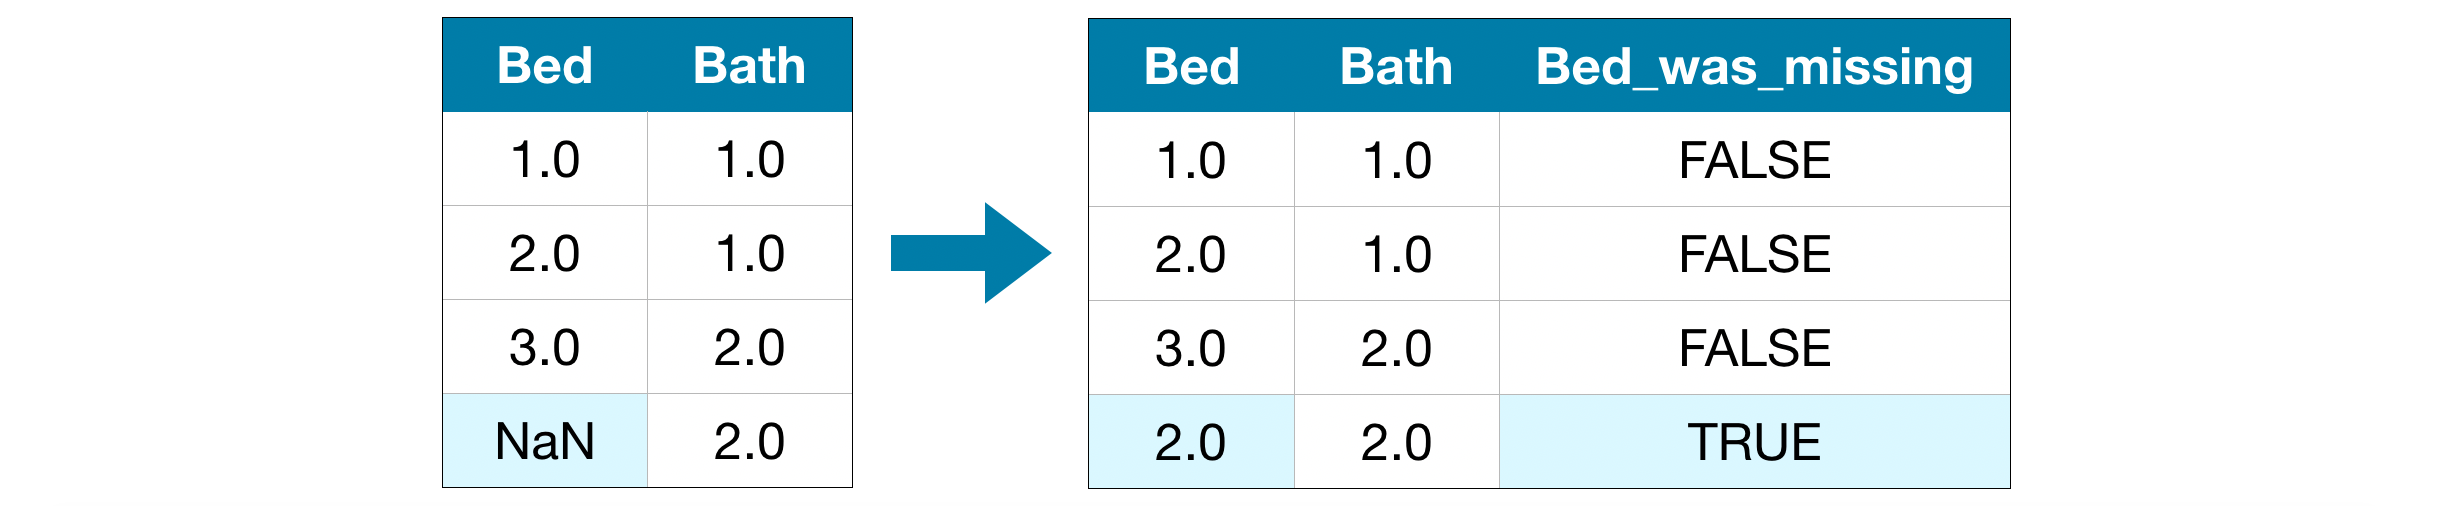

In this approach, we impute the missing values, as before. And, additionally, for each column with missing entries in the original dataset, we add a new column that shows the location of the imputed entries.

In some cases, this will meaningfully improve results. In other cases, it doesn't help at all.

We see that Approach 2 has lower MAE than Approach 1, so Approach 2 performed better on this dataset.

# Score from Approach 3 (An Extension to Imputation)

Next, we impute the missing values, while also keeping track of which values were imputed.

In [173]:
# Make copy to avoid changing original data (when imputing)
X_train_plus = X_train.copy()
X_valid_plus = X_valid.copy()

# Make new columns indicating what will be imputed
for col in cols_with_missing:
    X_train_plus[col + '_was_missing'] = X_train_plus[col].isnull()
    X_valid_plus[col + '_was_missing'] = X_valid_plus[col].isnull()

# Imputation
my_imputer = SimpleImputer()
imputed_X_train_plus = pd.DataFrame(my_imputer.fit_transform(X_train_plus))
imputed_X_valid_plus = pd.DataFrame(my_imputer.transform(X_valid_plus))

# Imputation removed column names; put them back
imputed_X_train_plus.columns = X_train_plus.columns
imputed_X_valid_plus.columns = X_valid_plus.columns

# Preprocessed Training and Validation sets:
final_X_train = imputed_X_train_plus
final_X_valid = imputed_X_valid_plus

print("MAE from Approach 3 (An Extension to Imputation):")
print(score_dataset(imputed_X_train_plus, imputed_X_valid_plus, y_train, y_valid))

MAE from Approach 3 (An Extension to Imputation):
173404.20797578874


In [186]:
from sklearn.metrics import mean_absolute_error

model = RandomForestRegressor(n_estimators=100, random_state=0)
model.fit(X_train, y_train)

# Get names of columns with missing values
cols_with_missing = [col for col in X_train.columns
                     if X_train[col].isnull().any()]

# test data
final_X_test = X_test.drop(cols_with_missing, axis=1)
final_X_test = pd.DataFrame(my_imputer.transform(X_test))

# Predict
preds_test = model.predict(final_X_test)

In [180]:
# Save test predictions to file
output = pd.DataFrame({'Id': X_test.index,
                       'SalePrice': preds_test})
output.to_csv('kaggle_output_missingvaluesexercise.csv', index=False)

In [156]:
# Shape of training data (num_rows, num_columns)
print(X_train.shape)

# Number of missing values in each column of training data
missing_val_count_by_column = (X_train.isnull().sum())
print(missing_val_count_by_column[missing_val_count_by_column > 0])

(7109, 12)
Series([], dtype: int64)
